# Chapter 2. pandas의 가동

In [2]:
import numpy as np
import pandas as pd

import datetime

# 판다스 렌더링 방식 제어 옵션
# pd.set_option('display.notebook_repr_html', False) # 표 형식으로 출력되는 것이 아니라, 텍스트 형식으로 출력
pd.set_option('display.max_columns', 7) # 최대 몇개까지의 컬럼을 표시할 것인지 설정
pd.set_option('display.max_rows', 10) # 최대 몇개까지의 로우를 표시할 것인지 설정
pd.set_option('display.width', 60) # 한 셀에 최대 몇글자까지 표시할 것인지 설정

# Pandas Series

인덱스를 가지는 배열 형태의 자료구조

In [6]:
s = pd.Series([1, 2, 3, 4])

print(s)

0    1
1    2
2    3
3    4
dtype: int64


In [13]:
print(s[0])
print(s[[0]]) # 대괄호안에 인덱스 리스트를 입력해주면, series 형태로 결과가 출력된다.
print(s[[1, 3]]) # 여러 인덱스를 지정해 여러 값을 한번에 가져올 수 있다.

1
a    1
dtype: int64
b    2
d    4
dtype: int64


### 사용자 정의 인덱스 생성

In [10]:
# 시리즈의 값과 인덱스의 길이는 같아야 한다.
s = pd.Series([1, 2, 3, 4],
              index = ['a', 'b', 'c', 'd'])

print(s)

a    1
b    2
c    3
d    4
dtype: int64


In [19]:
print('인덱스 명으로 조회')
print('\n', s['a'])
print('\n', s[['a']])
print('\n', s[['b', 'd']])

print('-------------------------')
print('인덱스 위치 값으로 조회')
print('\n', s[0])
print('\n', s[[0]])
print('\n', s[[1, 3]])

인덱스 명으로 조회

 1

 a    1
dtype: int64

 b    2
d    4
dtype: int64
-------------------------
인덱스 위치 값으로 조회

 1

 a    1
dtype: int64

 b    2
d    4
dtype: int64


In [20]:
print(s.index) # 시리즈의 인덱스는 'index'라는 판다스 객체

Index(['a', 'b', 'c', 'd'], dtype='object')


### pd.date_range()

날짜 범위 생성

In [5]:
dates = pd.date_range('2023-07-01', '2023-07-07')
print(dates)

DatetimeIndex(['2023-07-01', '2023-07-02', '2023-07-03',
               '2023-07-04', '2023-07-05', '2023-07-06',
               '2023-07-07'],
              dtype='datetime64[ns]', freq='D')


In [6]:
# dates를 인덱스로 시리즈 생성 - 시계열 데이터
temps1 = pd.Series([80, 82, 85, 90, 83, 87, 88],
                   index = dates)

print(temps1)
print(temps1['2023-07-05'])

2023-07-01    80
2023-07-02    82
2023-07-03    85
2023-07-04    90
2023-07-05    83
2023-07-06    87
2023-07-07    88
Freq: D, dtype: int64
83


### 시리즈 간의 산술 연산

In [7]:
temps2 = pd.Series([70, 75, 69, 83, 79, 77, 71],
                   index = dates)

temp_diff = temps1 - temps2
print(temp_diff)

2023-07-01    10
2023-07-02     7
2023-07-03    16
2023-07-04     7
2023-07-05     4
2023-07-06    10
2023-07-07    17
Freq: D, dtype: int64


In [8]:
# 만약 갯수가 다르면? -> 부족한 부분에 대해서는 None으로 채워진다.
temps3 = pd.Series([70, 75, 69, 83, 79, 77],
                   index = dates[:-1])

temp_diff = temps1 - temps3
print(temp_diff)

2023-07-01    10.0
2023-07-02     7.0
2023-07-03    16.0
2023-07-04     7.0
2023-07-05     4.0
2023-07-06    10.0
2023-07-07     NaN
Freq: D, dtype: float64


In [9]:
# 스칼라 값이 아닌 Series 간의 산술 연산 결과는?
s1 = pd.Series(['a', 'b', 'c', 'd'])
s2 = pd.Series(['e', 'f', 'g', 'h'])

diff = s1 + s2
print(diff)

0    ae
1    bf
2    cg
3    dh
dtype: object


In [10]:
# 집계 계산 -e 집계를 위한 다양한 메서드 제공
print(temp_diff.mean())
print(temp_diff.sum())
print(temp_diff.max())
print(temp_diff.min())
print(temp_diff.median())

9.0
54.0
16.0
4.0
8.5


# Pandas DataFrame

데이터 프레임은 인덱스 레이블을 기준으로 배열된 하나 이상의 Series를 나타낸다.

In [11]:
df = pd.DataFrame(
                    {
                        'Missoula': temps1,
                        'Philadelphia': temps2
                    }
)
# 데이터 프레임의 구성값으로 넣어주는 Series에 인덱스가 있기 때문에 인덱스가 자동으로 설정되었다.
# 아닌 경우에 제로 베이스 인덱스가 설정 된다.
display(df)

df_ = pd.DataFrame(
                    {
                        'sample1': [1, 2, 3, 4, 5],
                        'sample2': [6, 7, 8, 9, 10]
                    }
)
display(df_)

,Missoula,Philadelphia
2023-07-01,80,70
2023-07-02,82,75
2023-07-03,85,69
2023-07-04,90,83
2023-07-05,83,79
2023-07-06,87,77
2023-07-07,88,71


,sample1,sample2
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


### 데이터 조회

In [17]:
# 원하는 로우/컬럼의 데이터를 읽어오기
display(df[1:4])
display(df['Missoula'][1:4])

,Missoula,Philadelphia
2023-07-02,82,75
2023-07-03,85,69
2023-07-04,90,83


2023-07-02    82
2023-07-03    85
2023-07-04    90
Freq: D, Name: Missoula, dtype: int64

In [29]:
# 원하는 인덱스의 데이터를 읽어오기
# loc : 인덱스 레이블을 사용해 검색
# iloc : 제로베이스 인덱스를 사용해 검색

print(df.iloc[1])
print(df.loc['2023-07-02'])

# 여러 행 조회도 가능

print(df.iloc[[1, 2, 3]])

Missoula        82
Philadelphia    75
Name: 2023-07-02 00:00:00, dtype: int64
Missoula        82
Philadelphia    75
Name: 2023-07-02 00:00:00, dtype: int64
            Missoula  Philadelphia
2023-07-02        82            75
2023-07-03        85            69
2023-07-04        90            83


In [28]:
# 인덱스를 통해 row 데이터를 조회할 경우, row 데이터가 하나의 Series 자료구조가 되며, index는 컬럼명이 된다.

print(df.iloc[1].index)

Index(['Missoula', 'Philadelphia'], dtype='object')


### 파일 로딩

In [34]:
df = pd.read_csv(r'C:\Users\ENURI\Desktop\김동훈\Works\Andrew\Github\Basic\data\Learning-Pandas-Second-Edition-master\data\goog.csv')

In [37]:
type(df.Date[0])

str

In [65]:
# parse_dates 파라미터를 통해 date 값을 timestamp 객체로 읽어올 수 있다.

df = pd.read_csv(r'C:\Users\ENURI\Desktop\김동훈\Works\Andrew\Github\Basic\data\Learning-Pandas-Second-Edition-master\data\goog.csv',
                 parse_dates = ['Date'])

In [66]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [72]:
df.set_index('Date', inplace = True)

In [76]:
# 데이터를 읽어올 때, index_col 파라미터를 지정해줌으로써, 원하는 컬럼을 인덱스로 설정할 수 있다.

df = pd.read_csv(r'C:\Users\ENURI\Desktop\김동훈\Works\Andrew\Github\Basic\data\Learning-Pandas-Second-Edition-master\data\goog.csv',
                 parse_dates = ['Date'],
                 index_col = 'Date')

display(df.head())

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400


### 시각화

<AxesSubplot: xlabel='Date'>

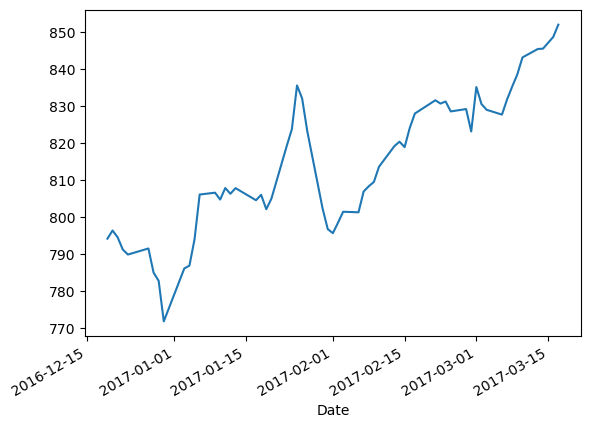

In [78]:
# Series 자료형에 대해서 plot 메서드를 통해 간단한 시각화 작업이 가능하다.

df['Close'].plot()